In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!jupyter nbextension enable hinterland/hinterland

Enabling notebook extension hinterland/hinterland...
      - Validating: ok


In [140]:
data  = pd.read_csv("C:\Git\Car-price-predication\data\Data.csv")

In [141]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [143]:
data.columns = data.columns.str.lower()

# Clean Fuel Column

In [144]:
data['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [145]:
data[data['fuel_type'].isna()].count()

name          55
company       55
year          55
price         55
kms_driven     3
fuel_type      0
dtype: int64

In [146]:
data = data[~data['fuel_type'].isna()]
data['fuel_type'].unique()

array(['Petrol', 'Diesel', 'LPG'], dtype=object)

# Clean Price Column

In [147]:
print(f"Total Columns\t {data.shape[0]}")
print(f"Non Int Column\t {data.shape[0] - data['price'].str.replace(',', '').str.isdigit().sum()}")

Total Columns	 837
Non Int Column	 21


In [148]:
data['price'] = data['price'].str.replace(',', '')
data = data[data['price'].str.isdigit()]


# Clean Year Column

In [149]:
data['year'].unique()

array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '2003', '2004', '1995', '2002', '2001'], dtype=object)

# Claen Company Column

In [150]:
data['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

# Claen kms_driven Column

In [151]:
data['kms_driven'] = data['kms_driven'].str.replace('kms', ',').str.replace(',','')

# Claen Name Column

In [152]:
data['name'] = data['name'].str.split().str.slice(0, 3).str.join(' ')

In [153]:
data = data.reset_index(drop=True)
data.head()

,name,company,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [154]:
def convert_to_int(column_name):
    try:
        data[column_name] = data[column_name].astype(int)
    except ValueError:
        print(f"{column_name} not for numeric")

for column in data.columns:
    convert_to_int(column)

name not for numeric
company not for numeric
fuel_type not for numeric


In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [156]:
data.describe()

,year,price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


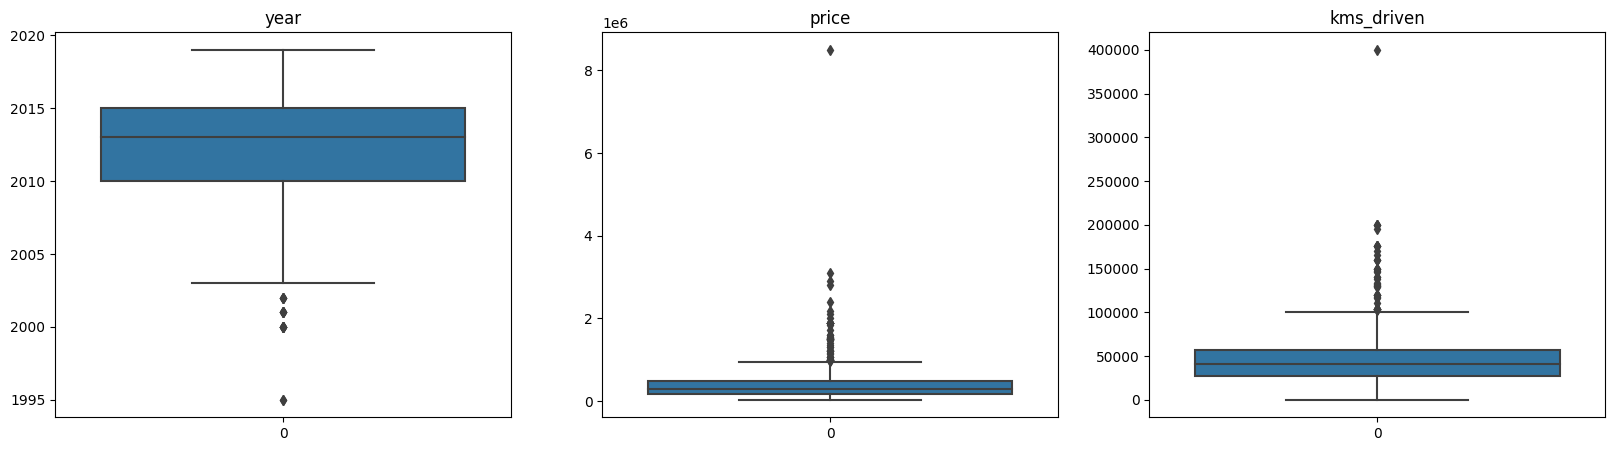

In [157]:
def check_outliear(column_names:list):
    fig, ax = plt.subplots(1,3, figsize=(20,5))
    for i in range(len(column_names)):
        column_name = column_names[i]
        sns.boxplot(data=data[column_name], ax=ax[i])
        ax[i].set_title(column_name)
    plt.show()

check_outliear(['year', 'price', 'kms_driven'])

In [158]:
data[data['year']<2000]

,name,company,year,price,kms_driven,fuel_type
372,Maruti Suzuki Maruti,Maruti,1995,30000,55000,Petrol
721,Hindustan Motors Ambassador,Hindustan,1995,750000,37000,Petrol


In [159]:
data[data['price']>6000000]

,name,company,year,price,kms_driven,fuel_type
534,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [160]:
data = data[data['price']<6000000]

<AxesSubplot:>

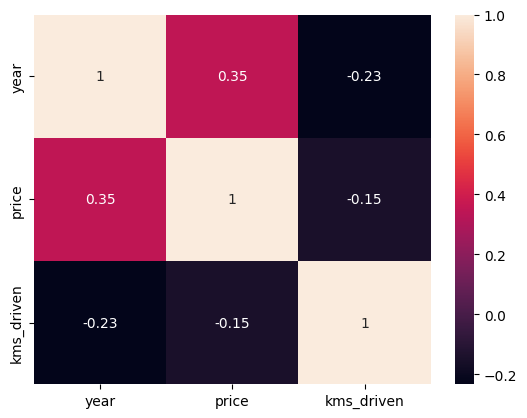

In [161]:
corr = data.corr()
sns.heatmap(corr, annot=True)

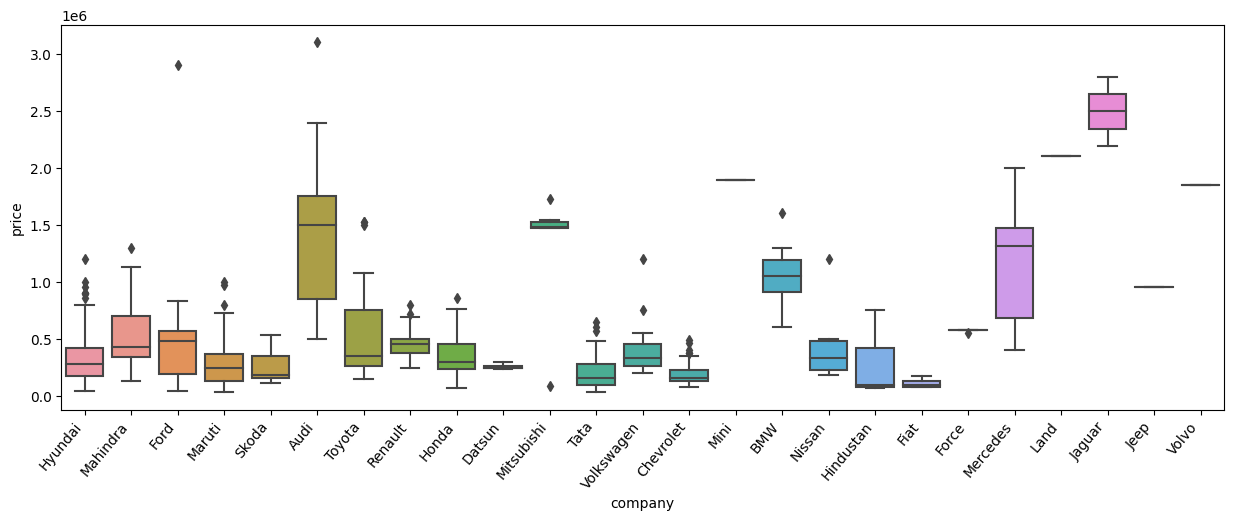

In [162]:
# company vs price
plt.figure(figsize=(15,5))
sx = sns.boxplot(x='company', y='price', data=data)
sx.set_xticklabels(sx.get_xticklabels(), rotation=50, ha='right')
plt.show()

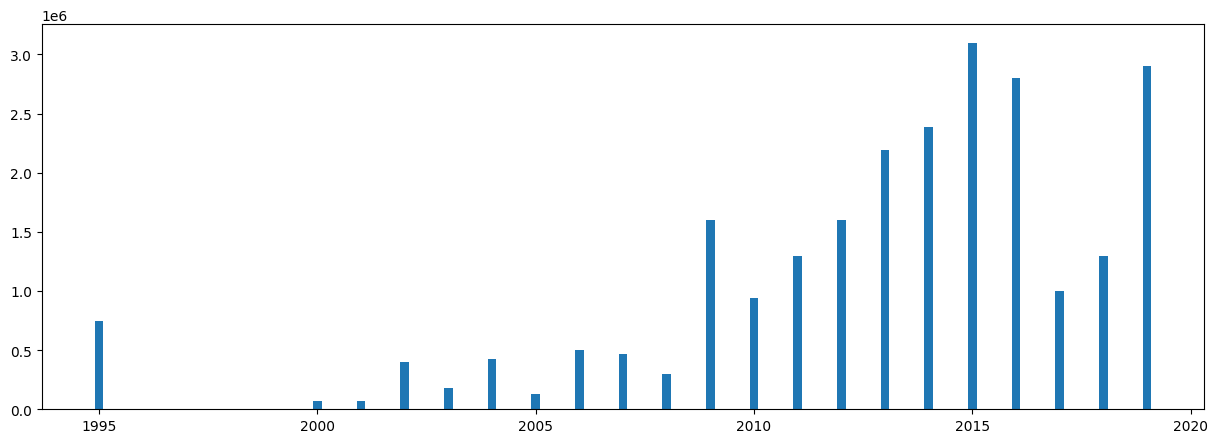

In [163]:
plt.figure(figsize=(15,5))
sx = plt.bar(data['year'], data['price'],width=0.2)
plt.show()

In [164]:
summary = data.groupby(['company']).agg(sale_count=('price','count'),
                                               total_sale=('price', 'sum')).reset_index()
summary

,company,sale_count,total_sale
0,Audi,11,16246000
1,BMW,8,8399000
2,Chevrolet,34,6870899
3,Datsun,7,1789998
4,Fiat,4,439500
5,Force,4,2290000
6,Ford,30,14393997
7,Hindustan,3,910000
8,Honda,60,20857975
9,Hyundai,139,44257987


<Figure size 2000x2000 with 0 Axes>

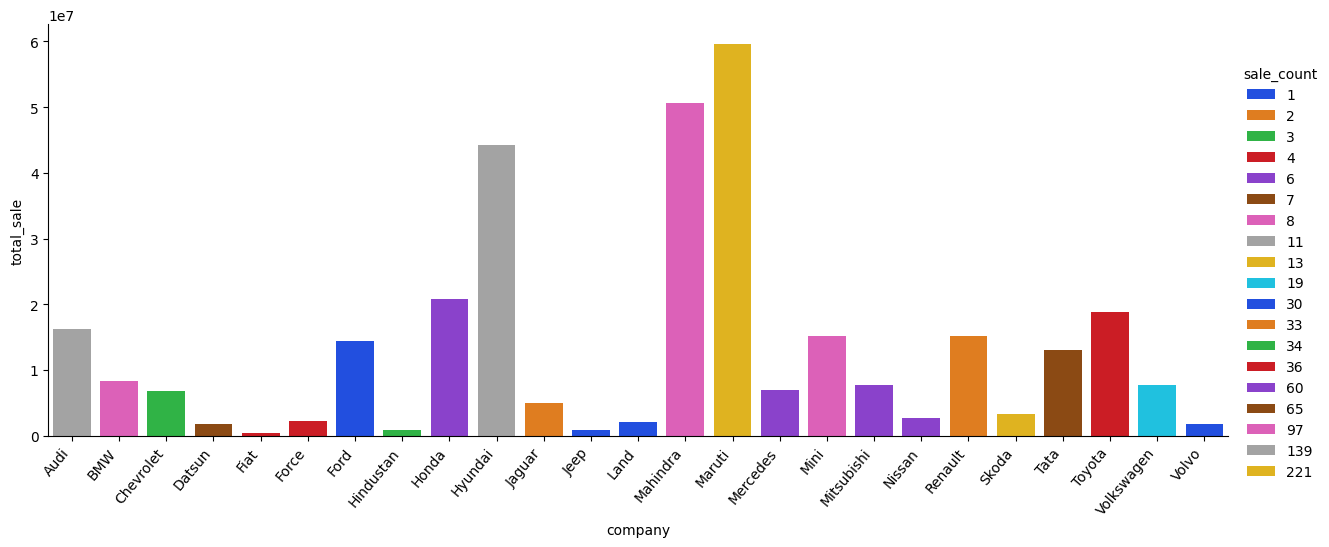

In [165]:
plt.figure(figsize=(20,20))
sx = sns.catplot(x='company', y='total_sale', data=summary, kind='bar', hue='sale_count', aspect=2.5, palette=(sns.color_palette("bright", 10)), dodge=False)
sx.set_xticklabels(rotation=50, ha='right')
plt.show()

# Train Model

In [166]:
clean_data = data

In [167]:
clean_data

,name,company,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_data = clean_data.drop(["price"], axis=1)
y_data = clean_data["price"]

In [170]:
x_train,x_test,y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=4)


In [171]:
y_test.shape

(163,)

In [172]:
from sklearn.preprocessing import OneHotEncoder
OneHot = OneHotEncoder()
OneHot.fit(x_data[['name', 'company', 'fuel_type']])

OneHotEncoder()

In [175]:
from sklearn.compose import make_column_transformer
tranformed_col = make_column_transformer((OneHotEncoder(categories=OneHot.categories_),["name", "company", "fuel_type"]), remainder="passthrough")

In [176]:
tranformed_col.fit(x_train, y_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                 ['name', 'company', 'fuel_type'])])

In [177]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
pipline = make_pipeline(tranformed_col, Lr)

In [178]:
pipline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [179]:
pipline.fit(x_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [180]:
y_predict = pipline.predict(x_test)

# /////

In [183]:
from sklearn.metrics import r2_score, mean_squared_error
print(f"R2 score\t{r2_score(y_test, y_predict)}")
print(f"MSE score\t{mean_squared_error(y_test, y_predict)}")

R2 score	0.8538249086783997
MSE score	22548228487.408195


# K-Fold

In [184]:
clean_data.columns.tolist()
columns = clean_data.columns.tolist()
columns.remove("price")
x_data = clean_data[columns].values
y_data = clean_data["price"].values

In [185]:
from sklearn.model_selection import KFold
k_fold = KFold(10)

In [204]:
list_score_r_two = []
list_score_r_mse = []

for train_idx, test_idx in k_fold.split(x_data):
        x_train = x_data[train_idx]
        y_train = y_data[train_idx]

        x_test = x_data[test_idx]
        y_test = y_data[test_idx]

        x_train = pd.DataFrame(data=x_train, columns=columns)
        y_train = pd.DataFrame(data=y_train, columns=['price'])

        x_test = pd.DataFrame(data=x_test, columns=columns)
        y_test = pd.DataFrame(data=y_test, columns=['price'])


        pipline.fit(x_train, y_train)

        y_predict = pipline.predict(x_test)

        list_score_r_two.append(r2_score(y_test, y_predict))
        list_score_r_mse.append(mean_squared_error(y_test.values, y_predict))


In [205]:
list_score_r_two

[0.36511427744503433,
 0.5806549896983548,
 0.674642837548457,
 0.9431641630919008,
 0.6105019917436734,
 0.6989283112852165,
 0.7085593688799334,
 0.7814319746301568,
 0.6259578298734694,
 0.28675486494059566]

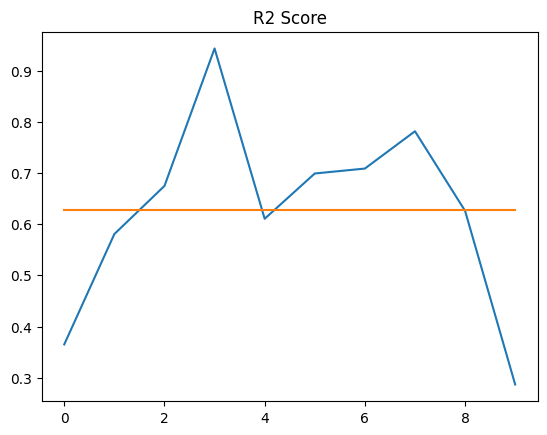

In [216]:
plt.plot(list_score_r_two)
plt.plot([np.mean(list_score_r_two)] * 10)
plt.title("R2 Score")
plt.show()

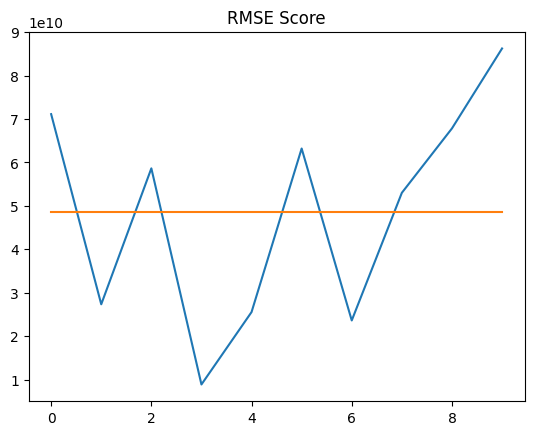

In [217]:
plt.plot(list_score_r_mse)
plt.plot([np.mean(list_score_r_mse)] * 10)
plt.title("RMSE Score")
plt.show()

In [219]:
pipline.predict(pd.DataFrame(columns=columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([[423693.31984761]])

In [228]:
pipline

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [229]:
import pickle
pickle.dump(pipline, open("PricePredicationLRModel.pkl", 'wb'))